# Multi Armed Bandit Playground

In [42]:
import numpy as np

from scipy.stats import bernoulli
from scipy.stats import norm

import seaborn as sns
from matplotlib import pyplot as plt

## Slot Machine Simulator

Reward types:

* bernoulli
  - Binary (**0** or **1**) reward with a given probability *p*
* norm
  - Continuos reward given by a normal distribution defined by *μ* and *σ*


In [31]:
class MABMachines(object):
    
    reward_type_list = ['bernoulli', 'norm']

    def __init__(self, machine_reward_list, reward_type = 'bernoulli', seed = None):
        
        if reward_type not in MABMachines.reward_type_list:
            raise ValueError("Reward Type unknown")
        
        self.machine_reward_list = machine_reward_list
        self.reward_type = reward_type
        np.random.seed(seed)
        

    def pull_lever(self, machine_idx):
        if self.reward_type == 'bernoulli':
            return bernoulli.rvs(self.machine_reward_list[machine_idx], size=1)[0]
        elif self.reward_type == 'norm':
            return norm.rvs(loc=self.machine_reward_list[machine_idx][0],scale=self.machine_reward_list[machine_idx][1],size=1)[0]       

### Simulations

[Text(0.5, 0, 'Lever'),
 Text(0, 0.5, 'Expected Reward'),
 Text(0.5, 1.0, 'Expected reward for each lever')]

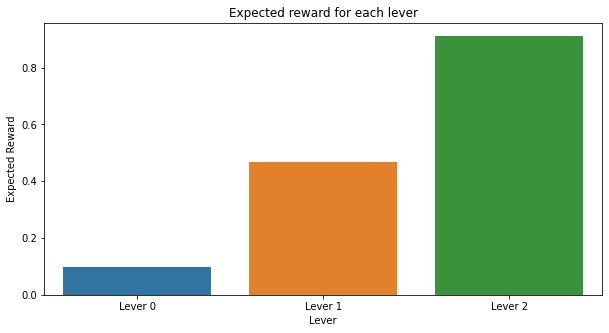

In [69]:
N = 1000
bin_mab_prob_list = [0.1, 0.5, 0.9]
bin_mab = MABMachines(bin_mab_prob_list, reward_type='bernoulli')
bin_mab_reward_mean = {}

fig = plt.figure(figsize=(10,5))
for i, prob in enumerate(bin_mab_prob_list):
   bin_mab_reward_mean[prob] = np.mean([bin_mab.pull_lever(i) for _ in range(N)])

p = sns.barplot(
    x=list(range(len(bin_mab_prob_list))),
    y=list(bin_mab_reward_mean.values())
    )
p.set(xticklabels=[f"Lever {i}" for i in list(range(len(bin_mab_prob_list)))])
p.set(xlabel = 'Lever', ylabel = 'Expected Reward', title='Expected reward for each lever')

In [32]:
norm_mab = MABMachines([(10,1),(15,2),(7,2)], reward_type='norm')

In [36]:
norm_mab.pull_lever(2)

5.663780608215998